In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from matplotlib.colors import TwoSlopeNorm
from scipy.interpolate import griddata
from matplotlib.colors import BoundaryNorm

In [56]:
#Open ether climate or mesh before opening the tecto file, 
# so you can plot using the coordinates that come in v
#Scenarios - some of them share similar inputs, what changes is either sealevel or erodibility
# subfolder1 = ''
# subfolder2 = ''
# subfolder3 = ''
subfolder4 = '../3_Runs/K8_strata/inputs_k8_strata/'
# subfolder5 = ''
# subfolder6 = ''
subfolder7 = '../3_Runs/No_Tectonics/inputs_new_subsidence/'
subfolder8 = '../3_Runs/No_Tectonics/inputs_new_subsidence/'

# dataset of the remaining models
dataMesh1 = np.load('../3_Runs/16Aug_thickness/inputs_16Aug_thicknes_sigma02/mesh2D.npz')
dataMesh2 = np.load('../3_Runs/17Aug_5Subs_files/inputs_17Aug_5subs/mesh2D.npz')
dataMesh3 = np.load('../3_Runs/K8_strata/inputs_k8_strata/mesh2D.npz')
dataMesh5 = np.load('../3_Runs/New_tecto_k7_t1_files/inputs_new_tecto_k7_t1/mesh2D.npz')
dataMesh6 = np.load('../3_Runs/No_Tectonics/inputs_new_subsidence/mesh2D.npz')

# dataset of the remaining models
dataTecto1 = np.load('../3_Runs/16Aug_thickness/inputs_16Aug_thicknes_sigma02/tecto1.npz')
dataTecto2 = np.load('../3_Runs/17Aug_5Subs_files/inputs_17Aug_5subs/tecto0.npz')
dataTecto3 = np.load('../3_Runs/K8_strata/inputs_k8_strata/tecto1.npz')
dataTecto5 = np.load('../3_Runs/New_tecto_k7_t1_files/inputs_new_tecto_k7_t1/tecto1.npz')
dataTecto6 = np.load('../3_Runs/No_Tectonics/inputs_new_subsidence/tecto0.npz')


CLI1 = np.load('../3_Runs/16Aug_thickness/inputs_16Aug_thicknes_sigma02/cli3.npz')
CLI2 = np.load('../3_Runs/17Aug_5Subs_files/inputs_17Aug_5subs/cli3.npz')
CLI3 = np.load('../3_Runs/K8_strata/inputs_k8_strata/cli3.npz')
CLI5 = np.load('../3_Runs/New_tecto_k7_t1_files/inputs_new_tecto_k7_t1/cli3.npz')
CLI6 = np.load('../3_Runs/No_Tectonics/inputs_new_subsidence/cli3.npz')


In [51]:
# Extract elevation arrays from mesh2D
elev1 = dataMesh1['z']
elev2 = dataMesh2['z']
elev3 = dataMesh3['z']
elev5 = dataMesh5['z']
elev6 = dataMesh6['z']


# Extract arrays for mesh2D
v1 = dataMesh1['v']
v2 = dataMesh2['v']
v3 = dataMesh3['v']
v5 = dataMesh5['v']
v6 = dataMesh6['v']

# Extract arrays for z values from tecto
z1 = dataTecto1['z']
z2 = dataTecto2['z']
z3 = dataTecto3['z']
z5 = dataTecto5['z']
z6 = dataTecto6['z']


# Extract climate arrays from cli*.npz

cli1 = CLI1['z']
cli2 = CLI2['z']
cli3 = CLI3['z']
cli5 = CLI5['z']
cli6 = CLI6['z']


In [52]:
CLI1['z'].max(), CLI1['z'].min()

(np.float64(2.79441170082103), np.float64(0.045913247826178206))

In [53]:
# Define the color map and normalization to ensure all plots share the same colorbar
cmap = plt.get_cmap('PiYG')
bounds = np.arange(6.5, 0, 0.5)  # Define bounds with steps of 1 unit
# norm = BoundaryNorm(bounds, cmap.N)
# Adjust the bounds to ensure the center is white
# bounds = np.insert(bounds, np.searchsorted(bounds, 0), 0)

# Create a normalization instance
# norm = BoundaryNorm(bounds, cmap.N)

# # Define the qualitative color map and normalization
# cmap = plt.get_cmap('tab10')  # You can choose any qualitative colormap
# norm = TwoSlopeNorm(vmin=min(z1.min(), z2.min(), z3.min(), z5.min(), z6.min()), vcenter=0, vmax=max(z1.max(), z2.max(), z3.max(), z5.max(), z6.max()))

cmap = 'twilight'


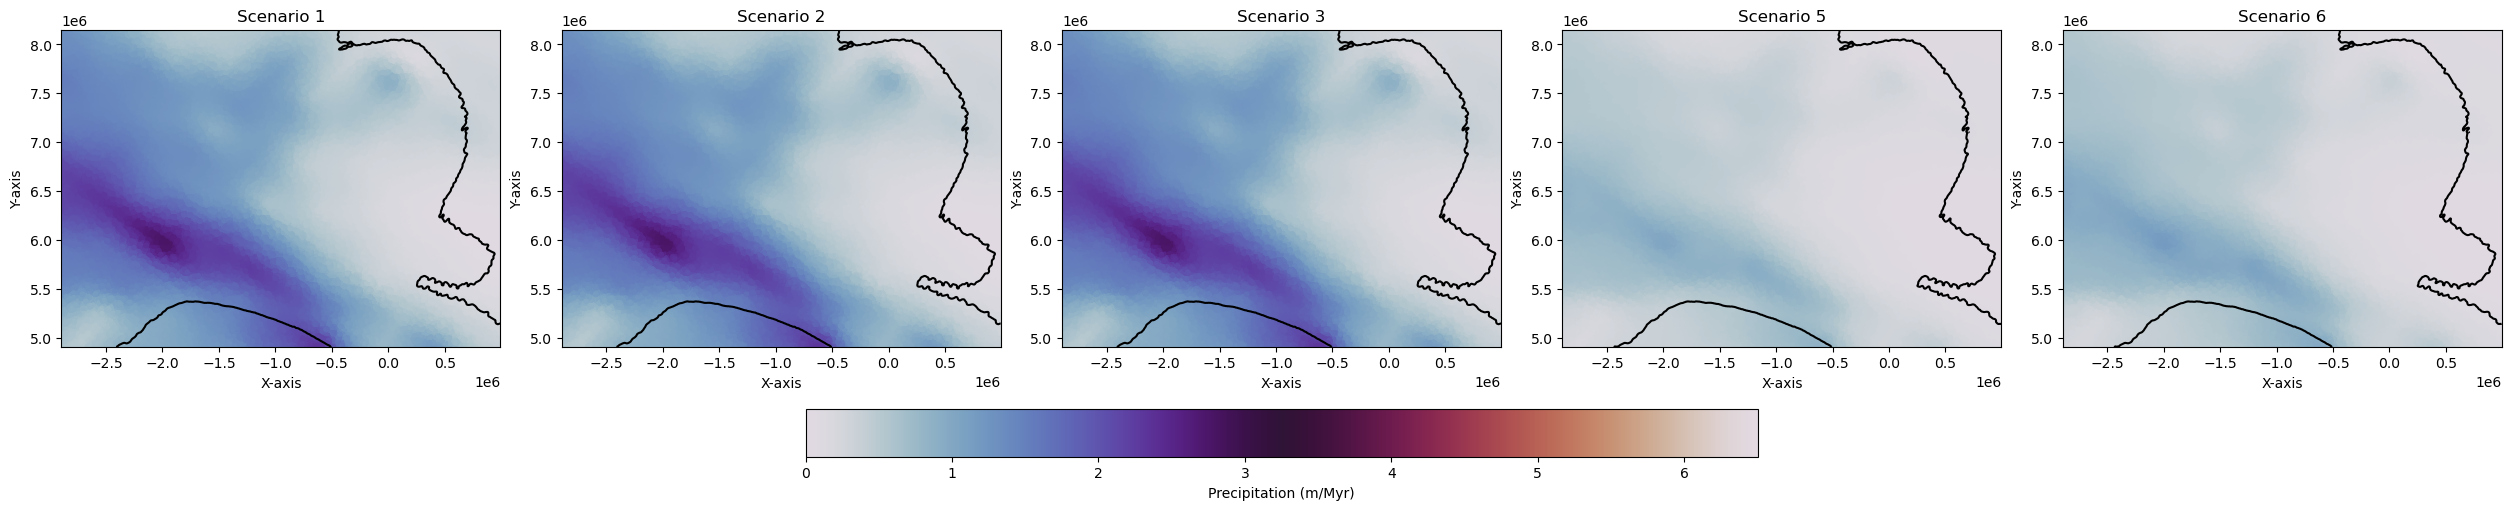

In [54]:
# Define the color scale limits
vmin = 0
vmax = 6.5

# Create subplots with constrained layout
fig, axs = plt.subplots(1, 5, figsize=(25, 5), constrained_layout=True)

# Plot for model 1
sc1 = axs[0].scatter(v1[:, 0], v1[:, 1], c=cli1, cmap='twilight', marker='.', vmin=vmin, vmax=vmax)
axs[0].tricontour(v1[:, 0], v1[:, 1], elev1, levels=[0], colors='black')
axs[0].set_title('Scenario 1')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')

# Plot for model 2
sc2 = axs[1].scatter(v2[:, 0], v2[:, 1], c=cli2, cmap='twilight', marker='.', vmin=vmin, vmax=vmax)
axs[1].tricontour(v2[:, 0], v2[:, 1], elev2, levels=[0], colors='black')
axs[1].set_title('Scenario 2')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')

# Plot for model 3
sc3 = axs[2].scatter(v3[:, 0], v3[:, 1], c=cli3, cmap='twilight', marker='.', vmin=vmin, vmax=vmax)
axs[2].tricontour(v3[:, 0], v3[:, 1], elev3, levels=[0], colors='black')
axs[2].set_title('Scenario 3')
axs[2].set_xlabel('X-axis')
axs[2].set_ylabel('Y-axis')

# Plot for model 5
sc5 = axs[3].scatter(v5[:, 0], v5[:, 1], c=cli5, cmap='twilight', marker='.', vmin=vmin, vmax=vmax)
axs[3].tricontour(v5[:, 0], v5[:, 1], elev5, levels=[0], colors='black')
axs[3].set_title('Scenario 5')
axs[3].set_xlabel('X-axis')
axs[3].set_ylabel('Y-axis')

# Plot for model 6
sc6 = axs[4].scatter(v6[:, 0], v6[:, 1], c=cli6, cmap='twilight', marker='.', vmin=vmin, vmax=vmax)
axs[4].tricontour(v6[:, 0], v6[:, 1], elev6, levels=[0], colors='black')
axs[4].set_title('Scenario 6')
axs[4].set_xlabel('X-axis')
axs[4].set_ylabel('Y-axis')

# Add a single colorbar for all subplots with zero as white
cbar = fig.colorbar(sc6, ax=axs.ravel().tolist(), orientation='horizontal')
cbar.set_label('Precipitation (m/Myr)')

# Show plot
plt.savefig("./Figures_charts/Cli3_All_Scenario.png")
plt.show()

In [49]:
#Open ether climate or mesh before opening the tecto file, 
# so you can plot using the coordinates that come in v
#Scenarios - some of them share similar inputs, what changes is either sealevel or erodibility
# subfolder1 = ''
# subfolder2 = ''
# subfolder3 = ''
subfolder4 = '../3_Runs/K8_strata/inputs_k8_strata/'
# subfolder5 = ''
# subfolder6 = ''
subfolder7 = '../3_Runs/No_Tectonics/inputs_new_subsidence/'
subfolder8 = '../3_Runs/No_Tectonics/inputs_new_subsidence/'

# dataset of the remaining models
dataMesh1 = np.load('../3_Runs/16Aug_thickness/inputs_16Aug_thicknes_sigma02/mesh2D.npz')
dataMesh2 = np.load('../3_Runs/17Aug_5Subs_files/inputs_17Aug_5subs/mesh2D.npz')
dataMesh3 = np.load('../3_Runs/K8_strata/inputs_k8_strata/mesh2D.npz')
dataMesh5 = np.load('../3_Runs/New_tecto_k7_t1_files/inputs_new_tecto_k7_t1/mesh2D.npz')
# dataMesh6 = np.load('../3_Runs/No_Tectonics/inputs_new_subsidence/mesh2D.npz')

# dataset of the remaining models
# dataTecto1 = np.load('../3_Runs/16Aug_thickness/inputs_16Aug_thicknes_sigma02/tecto5.npz')
dataTecto2 = np.load('../3_Runs/17Aug_5Subs_files/inputs_17Aug_5subs/tecto7.npz')
# dataTecto3 = np.load('../3_Runs/K8_strata/inputs_k8_strata/tecto5.npz')
# dataTecto5 = np.load('../3_Runs/New_tecto_k7_t1_files/inputs_new_tecto_k7_t1/tecto4.npz')
# dataTecto6 = np.load('../3_Runs/No_Tectonics/inputs_new_subsidence/tecto0.npz')


# Load the .npz file




In [ ]:
# Extract elevation arrays from mesh2D
elev1 = dataMesh1['z']
elev2 = dataMesh2['z']
elev3 = dataMesh3['z']
elev5 = dataMesh5['z']
elev6 = dataMesh6['z']



# Extract arrays for mesh2D
v1 = dataMesh1['v']
v2 = dataMesh2['v']
v3 = dataMesh3['v']
v5 = dataMesh5['v']
v6 = dataMesh6['v']

# Extract arrays for z values from tecto
z1 = dataTecto1['z']
z2 = dataTecto2['z']
z3 = dataTecto3['z']
z5 = dataTecto5['z']
z6 = dataTecto6['z']




In [ ]:
cmap = 'twilight'

# Create subplots with constrained layout
fig, axs = plt.subplots(1, 5, figsize=(25, 5), constrained_layout=True)


# Plot for model 1
sc1 = axs[0].scatter(v1[:, 0], v1[:, 1], c=cli1, cmap=cmap, norm=norm, marker='.')
axs[0].tricontour(v1[:, 0], v1[:, 1], elev1, levels=[0], colors='black')
axs[0].set_title('Scenario 1')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')

# Plot for model 2
sc2 = axs[1].scatter(v2[:, 0], v2[:, 1], c=cli2, cmap=cmap, norm=norm, marker='.')
axs[1].tricontour(v2[:, 0], v2[:, 1], elev2, levels=[0], colors='black')
axs[1].set_title('Scenario 2')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')

# Plot for model 3
sc3 = axs[2].scatter(v3[:, 0], v3[:, 1], c=cli3, cmap=cmap, norm=norm, marker='.')
axs[2].tricontour(v3[:, 0], v3[:, 1], elev3, levels=[0], colors='black')
axs[2].set_title('Scenario 3')
axs[2].set_xlabel('X-axis')
axs[2].set_ylabel('Y-axis')

# Plot for model 5
sc5 = axs[3].scatter(v5[:, 0], v5[:, 1], c=cli5, cmap=cmap, norm=norm, marker='.')
axs[3].tricontour(v5[:, 0], v5[:, 1], elev5, levels=[0], colors='black')
axs[3].set_title('Scenario 5')
axs[3].set_xlabel('X-axis')
axs[3].set_ylabel('Y-axis')

# Plot for model 6
sc6 = axs[4].scatter(v6[:, 0], v6[:, 1], c=cli6, cmap=cmap, norm=norm, marker='.')
axs[4].tricontour(v6[:, 0], v6[:, 1], elev6, levels=[0], colors='black')
axs[4].set_title('Scenario 6 - disconsider')
axs[4].set_xlabel('X-axis')
axs[4].set_ylabel('Y-axis')

# Add a single colorbar for all subplots with zero as white
cbar = fig.colorbar(sc6, ax=axs.ravel().tolist(), orientation='horizontal')
cbar.set_label('Tectonic values')

# Show plot
plt.savefig("./Figures_charts/ClI0_All_Scenarios.png")
# plt.show()

In [ ]:
# Print the keys
print(list(dataMesh1.keys()))

In [ ]:
# Extract elevation arrays from mesh2D
elev1 = dataMesh1['z']

# Extract arrays for mesh2D
v1 = dataMesh1['v']

# Extract arrays for z values from tecto
z1 = dataTecto1['z']

# Create figure and axes
fig, axs = plt.subplots(1, 1)

# Plot for model 1
sc1 = axs.scatter(v1[:, 0], v1[:, 1], c=z1, cmap='PiYG', marker='.')
axs.tricontour(v1[:, 0], v1[:, 1], elev1, levels=[0], colors='black')
axs.set_title('Scenario 1')
axs.set_xlabel('X-axis')
axs.set_ylabel('Y-axis')
fig.colorbar(sc1, ax=axs)

plt.show()


In [ ]:
print(sc1)

In [ ]:
elev1.shape

In [ ]:


# Load the .npz file
data2 = np.load(subfolder+'cli0.npz')

# Extract arrays 
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
# plt.savefig(folder+subfolder+'input_cli.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'cli1.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_cli1.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'cli2.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_cli2.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'cli3.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_cli3.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'cli4.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_cli4.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'cli5.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_cli5.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'cli6.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_cli6.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'cli7.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_cli7.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'cli8.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_cli8.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'tecto0.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_tecto0.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'tecto1.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_tecto1.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'tecto3.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_tecto3.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'tecto4.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_tecto4.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'tecto5.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_tecto5.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'tecto6.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_tecto6.png')
# plt.show()

In [ ]:
#Open ether climate or mesh before opening the tecto file, 
# # so you can plot using the coordinates that come in v
# folder = '../3_Runs/'
# subfolder = 'inputs_no_tectonics/'
data = np.load(folder+subfolder+'mesh2D.npz')
# Load the .npz file
data2 = np.load(folder+subfolder+'tecto7.npz')

# Extract arrays
v = data['v']
c = data['c']
n = data['n']
z = data2['z']

# Plot the `v` data
plt.figure(figsize=(10, 6))
plt.scatter(v[:, 0], v[:, 1], c=z, cmap='viridis', marker='.')
plt.colorbar(label='z values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('v Data Plot')
plt.savefig(folder+subfolder+'input_tecto7.png')
# plt.show()

In [ ]:
sealevel = pd.read_csv('./sealevel_test6.csv')
sealevel


In [ ]:
x = sealevel.iloc[:, 0]
y  = sealevel.iloc[:, 1]

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-')
plt.xlabel('Age (Ma)')
plt.ylabel('sea level (m)')
plt.title('Sea level curve')
plt.grid(False)
plt.savefig('./Figures_charts/sealevelcurve_6.png')
plt.show()